Call or put? Enter in lowercase letters: call
Enter the expiration date (YYYY-MM-DD): 2023-12-15
Enter the stock ticker: HOLX
Enter the strike price: 70
Enter the option premium: .5


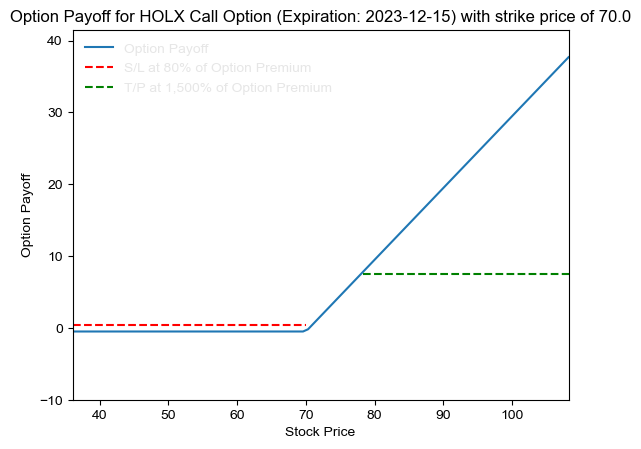

In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import mplcyberpunk

# Function to calculate the call option payoff
def call_option_payoff(stock_price, strike_price, option_premium):
    if stock_price < strike_price:
        return -option_premium
    else:
        return stock_price - strike_price - option_premium

# Function to calculate the put option payoff
def put_option_payoff(stock_price, strike_price, option_premium):
    if stock_price < strike_price:
        return max(strike_price - stock_price - option_premium, -option_premium)
    else:
        return -option_premium

# Function to plot the option payoff diagram
def plot_option_payoff(call_or_put, expiration_date, stock_ticker, strike_price, option_premium):
    # Get the last closing price of the stock from Yahoo Finance
    stock_info = yf.Ticker(stock_ticker).history(period='1d')
    current_price = stock_info['Close'][0]

    # Create a range of stock prices
    stock_prices = np.linspace(current_price * 0.5, current_price * 1.5, 100)

    # Calculate option payoffs based on call or put
    if call_or_put == "call":
        option_payoffs = [call_option_payoff(price, strike_price, option_premium) for price in stock_prices]
    elif call_or_put == "put":
        option_payoffs = [put_option_payoff(price, strike_price, option_premium) for price in stock_prices]

    # Create the figure and axis objects
    fig, ax = plt.subplots()

    # Set the axis limits
    ax.set_xlim([current_price * 0.5, current_price * 1.5])
    ax.set_ylim([-10, max(option_payoffs) * 1.1])

    # Set the axis labels
    ax.set_xlabel('Stock Price')
    ax.set_ylabel('Option Payoff')

    # Set the title
    ax.set_title(f'Option Payoff for {stock_ticker} {call_or_put.capitalize()} Option (Expiration: {expiration_date}) with strike price of {strike_price}')

    # Plot the option payoff function
    ax.plot(stock_prices, option_payoffs, label='Option Payoff')

    # Find the index where the option payoff is equal to the green line y value
    start_index = np.argmin(np.abs(np.array(option_payoffs) - 15 * option_premium))

    # Add horizontal red line at 80% of the option_premium value to the left of the option payoff
    if call_or_put == "call":
        ax.axhline(y=0.8 * option_premium, color='red', linestyle='--', label='S/L at 80% of Option Premium', xmin=0, xmax=(strike_price - current_price * 0.5) / (current_price * 1.5 - current_price * 0.5))
    else:
        # Flip the horizontal red line for a put option
        ax.axhline(y=0.8 * option_premium, color='red', linestyle='--', label='S/L at 80% of Option Premium', xmin=(strike_price - current_price * 0.5) / (current_price * 1.5 - current_price * 0.5), xmax=1)

    # Add horizontal green line for a call option starting from the intersection point and ending at the maximum x-axis value
    if call_or_put == "call":
        ax.axhline(y=15 * option_premium, color='green', linestyle='--', label='T/P at 1,500% of Option Premium', xmin=start_index / (len(stock_prices) - 1), xmax=1)
    else:
        # Find the index where the option payoff becomes non-negative
        start_index = next(i for i, payoff in enumerate(option_payoffs) if payoff >= 0)

        # Find the index where the option payoff is equal to the green line y value
        end_index = np.argmin(np.abs(np.array(option_payoffs) - 15 * option_premium))

        # Add horizontal green line for a put option starting from the intersection point and ending at the non-negative region
        ax.axhline(y=15 * option_premium, color='green', linestyle='--', label='T/P at 1,500% of Option Premium', xmin=start_index / (len(stock_prices) - 1), xmax=end_index / (len(stock_prices) - 1))

    plt.style.use('cyberpunk')

    # Add legend to the plot
    ax.legend(loc='upper left')

    plt.show()

# Request user input for option parameters
call_or_put = input("Call or put? Enter in lowercase letters: ")
expiration_date = input('Enter the expiration date (YYYY-MM-DD): ')
stock_ticker = input('Enter the stock ticker: ')
strike_price = float(input('Enter the strike price: '))
option_premium = float(input('Enter the option premium: '))

# Plot the option payoff diagram based on user input
plot_option_payoff(call_or_put, expiration_date, stock_ticker, strike_price, option_premium)


In [1]:
import yfinance as yf

msft = yf.Ticker("F")

# get all stock info (slow)
msft.info

HTTPError: 401 Client Error: Unauthorized for url: https://query1.finance.yahoo.com/v7/finance/quote?formatted=true&lang=en-US&symbols=F

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate the call option payoff
def call_option_payoff(stock_price, strike_price, option_premium):
    if stock_price < strike_price:
        return -option_premium
    else:
        return stock_price - strike_price - option_premium

# Function to calculate the put option payoff
def put_option_payoff(stock_price, strike_price, option_premium):
    if stock_price < strike_price:
        return max(strike_price - stock_price - option_premium, -option_premium)
    else:
        return -option_premium

# Function to plot the option payoff diagram
def plot_option_payoff(call_or_put, expiration_date, stock_ticker, strike_price, option_premium):
    # Get the last closing price of the stock from Yahoo Finance
    stock_info = yf.Ticker(stock_ticker).history(period='1d')
    current_price = stock_info['Close'][0]

    # Create a range of stock prices
    stock_prices = np.linspace(current_price * 0.5, current_price * 1.5, 100)

    # Calculate option payoffs based on call or put
    if call_or_put == "call":
        option_payoffs = [call_option_payoff(price, strike_price, option_premium) for price in stock_prices]
    elif call_or_put == "put":
        option_payoffs = [put_option_payoff(price, strike_price, option_premium) for price in stock_prices]

    # Create the figure and axis objects
    fig, ax = plt.subplots()

    # Set the axis limits
    ax.set_xlim([current_price * 0.5, current_price * 1.5])
    ax.set_ylim([-10, max(option_payoffs) * 1.1])

    # Set the axis labels
    ax.set_xlabel('Stock Price')
    ax.set_ylabel('Option Payoff')

    # Set the title
    ax.set_title(f'Option Payoff for {stock_ticker} {call_or_put.capitalize()} Option (Expiration: {expiration_date}) with strike price of {strike_price}')

    # Plot the option payoff function
    ax.plot(stock_prices, option_payoffs, label='Option Payoff')

    # Add horizontal red line at 80% of the option_premium value to the left of the option payoff
    if call_or_put == "call":
        ax.axhline(y=0.8 * option_premium, color='red', linestyle='--', label='S/L at 80% of Option Premium', xmin=0, xmax=.5)
    else:
        ax.axhline(y=0.8 * option_premium, color='red', linestyle='--', label='S/L at 80% of Option Premium', xmin=1, xmax=(strike_price - current_price * 0.5) / (current_price * 1.5 - current_price * 0.5))

    # Add horizontal green line at 133% of the option_premium value to the right of the option payoff
    if call_or_put == "call":
        # Add horizontal green line at 1,000% of the option_premium value to the right of the option payoff
        ax.axhline(y=10 * option_premium, color='green', linestyle='--', label='T/P at 1,000% of Option Premium', xmin=0.5, xmax=1)
    else:
        ax.axhline(y=10 * option_premium, color='green', linestyle='--', label='T/P at 1,000% of Option Premium', xmin=(strike_price - current_price * 0.5) / (current_price * 1.5 - current_price * 0.5), xmax=0)

    plt.style.use('cyberpunk')

    # Add legend to the plot
    ax.legend(loc='upper left')

    plt.show()

# Request user input for option parameters
call_or_put = input("Call or put? Enter in lowercase letters: ")
expiration_date = input('Enter the expiration date (YYYY-MM-DD): ')
stock_ticker = input('Enter the stock ticker: ')
strike_price = float(input('Enter the strike price: '))
option_premium = float(input('Enter the option premium: '))

# Plot the option payoff diagram based on user input
plot_option_payoff(call_or_put, expiration_date, stock_ticker, strike_price, option_premium)


In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import mplcyberpunk

# Function to calculate the call option payoff
def call_option_payoff(stock_price, strike_price, option_premium):
    if stock_price < strike_price:
        return -option_premium
    else:
        return stock_price - strike_price - option_premium

# Function to calculate the put option payoff
def put_option_payoff(stock_price, strike_price, option_premium):
    if stock_price < strike_price:
        return max(strike_price - stock_price - option_premium, -option_premium)
    else:
        return -option_premium

# Function to plot the option payoff diagram
def plot_option_payoff(call_or_put, expiration_date, stock_ticker, strike_price, option_premium):
    # Get the last closing price of the stock from Yahoo Finance
    stock_info = yf.Ticker(stock_ticker).history(period='1d')
    current_price = stock_info['Close'][0]

    # Create a range of stock prices
    stock_prices = np.linspace(current_price * 0.5, current_price * 1.5, 100)

    # Calculate option payoffs based on call or put
    if call_or_put == "call":
        option_payoffs = [call_option_payoff(price, strike_price, option_premium) for price in stock_prices]
    elif call_or_put == "put":
        option_payoffs = [put_option_payoff(price, strike_price, option_premium) for price in stock_prices]

    # Create the figure and axis objects
    fig, ax = plt.subplots()

    # Set the axis limits
    ax.set_xlim([current_price * 0.5, current_price * 1.5])
    ax.set_ylim([-10, max(option_payoffs) * 1.1])

    # Set the axis labels
    ax.set_xlabel('Stock Price')
    ax.set_ylabel('Option Payoff')

    # Set the title
    ax.set_title(f'Option Payoff for {stock_ticker} {call_or_put.capitalize()} Option (Expiration: {expiration_date}) with strike price of {strike_price}')

    # Plot the option payoff function
    ax.plot(stock_prices, option_payoffs, label='Option Payoff')

    # Find the index where the option payoff is equal to the green line y value
    start_index = np.argmin(np.abs(np.array(option_payoffs) - 15 * option_premium))

    # Add horizontal red line at 80% of the option_premium value to the left of the option payoff
    if call_or_put == "call":
        ax.axhline(y=0.8 * option_premium, color='red', linestyle='--', label='S/L at 80% of Option Premium', xmin=0, xmax=(strike_price - current_price * 0.5) / (current_price * 1.5 - current_price * 0.5))
    else:
        # Flip the horizontal red line for a put option
        ax.axhline(y=0.8 * option_premium, color='red', linestyle='--', label='S/L at 80% of Option Premium', xmin=(strike_price - current_price * 0.5) / (current_price * 1.5 - current_price * 0.5), xmax=1)

    # Add horizontal green line for a call option starting from the intersection point and ending at the maximum x-axis value
    if call_or_put == "call":
        ax.axhline(y=15 * option_premium, color='green', linestyle='--', label='T/P at 1,500% of Option Premium', xmin=start_index / (len(stock_prices) - 1), xmax=1)
    else:
        # Find the index where the option payoff becomes non-negative
        start_index = next(i for i, payoff in enumerate(option_payoffs) if payoff >= 0)

        # Find the index where the option payoff is equal to the green line y value
        end_index = np.argmin(np.abs(np.array(option_payoffs) - 15 * option_premium))

        # Add horizontal green line for a put option starting from the intersection point and ending at the non-negative region
        ax.axhline(y=15 * option_premium, color='green', linestyle='--', label='T/P at 1,500% of Option Premium', xmin=start_index / (len(stock_prices) - 1), xmax=end_index / (len(stock_prices) - 1))

    plt.style.use('cyberpunk')

    # Add legend to the plot
    ax.legend(loc='upper left')

    plt.show()

# Request user input for option parameters
call_or_put = input("Call or put? Enter in lowercase letters: ")
expiration_date = input('Enter the expiration date (YYYY-MM-DD): ')
stock_ticker = input('Enter the stock ticker: ')
strike_price = float(input('Enter the strike price: '))
option_premium = float(input('Enter the option premium: '))

# Plot the option payoff diagram based on user input
plot_option_payoff(call_or_put, expiration_date, stock_ticker, strike_price, option_premium)
